In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../input/Train.csv")
df_test = pd.read_csv("../input/Test.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")

In [16]:
s1 = set(df_test.INCIDENT_ID.tolist())
s2 = set(sample_submission.INCIDENT_ID.tolist())
s = s1.difference(s2)
print(s)

78626', 'CR_196937', 'CR_164915', 'CR_154170', 'CR_101766', 'CR_26682', 'CR_71202', 'CR_177562', 'CR_158969', 'CR_152883', 'CR_58333', 'CR_109971', 'CR_165441', 'CR_63606', 'CR_154162', 'CR_196744', 'CR_139567', 'CR_102556', 'CR_194306', 'CR_33405', 'CR_8500', 'CR_146547', 'CR_34343', 'CR_147592', 'CR_152876', 'CR_56993', 'CR_157812', 'CR_91372', 'CR_188312', 'CR_45593', 'CR_170315', 'CR_18951', 'CR_27308', 'CR_189567', 'CR_129047', 'CR_1748', 'CR_43380', 'CR_110970', 'CR_42795', 'CR_128869', 'CR_25792', 'CR_195751', 'CR_61383', 'CR_100103', 'CR_31419', 'CR_39449', 'CR_177825', 'CR_15714', 'CR_195698', 'CR_83332', 'CR_97821', 'CR_142652', 'CR_132728', 'CR_104328', 'CR_48874', 'CR_159755', 'CR_33712', 'CR_170515', 'CR_40403', 'CR_110674', 'CR_140641', 'CR_158532', 'CR_66251', 'CR_108215', 'CR_174618', 'CR_153133', 'CR_58811', 'CR_184583', 'CR_92741', 'CR_192634', 'CR_186356', 'CR_184621', 'CR_167056', 'CR_103253', 'CR_80719', 'CR_84602', 'CR_155714', 'CR_41422', 'CR_107569', 'CR_123382'

0        CR_195453
1        CR_103520
2        CR_196089
3        CR_112195
4        CR_149832
           ...    
15898     CR_44468
15899    CR_158460
15900    CR_115946
15901    CR_137663
15902     CR_33545
Name: INCIDENT_ID, Length: 15903, dtype: object

In [6]:
df.MULTIPLE_OFFENSE.value_counts()
# Therefore there is a huge imbalance in the dataset when it comes to no offences, that is in most of the datapoints that are available to us the offence did actually take place.
# Not sure, what to make out of it. Maybe look into Smote kind of sampling for it? Let's see...

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [49]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [50]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [51]:
df_test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


> Intersting to see that X_8 variable has a different max value for the test dataset <br>
> X_10 also has a different maximum value <br>
> X_12 max value is also different <br>
> X_13 also needs to be inspected <br>
<p>
But this observation is just by looking at the numbers, maybe it would be of our interest to actuall graph out the features (let's just plot the barplots of each and individual variable, perhaps we will discover someting new)

From the inspection of the quartile ranges as shown in .describe() method, it is fairly easy to see that X1-X7 are nearly similar there 25th an 75th quartile balues are also equal <br>
However, still we can't go around making assumptions about the distribution by just the quartile range values <br>

## X_1

### train

In [7]:
df['X_1'].value_counts()

0    19036
1     3497
7      876
5      270
3      136
4       26
2       10
6        5
Name: X_1, dtype: int64

Therefore all the values present are in fact integers, most occuring values are 0,1 and 7

(array([1.9036e+04, 3.4970e+03, 1.0000e+01, 0.0000e+00, 1.3600e+02,
        2.6000e+01, 0.0000e+00, 2.7000e+02, 5.0000e+00, 8.7600e+02]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

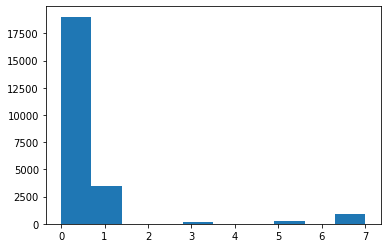

In [8]:
plt.hist(df['X_1'])

### test

In [9]:
df_test['X_1'].value_counts()

0    12778
1     2264
7      550
5      188
3       92
4       22
2        7
6        2
Name: X_1, dtype: int64

This kind of distribution if quite similar to that of the train, therefore, I do not have any reason to believe that X_1 is very different from the train data, therefore, I am very much in favour of using this variable <br>
Let's just plot the value as well to ensure everthing

(array([1.2778e+04, 2.2640e+03, 7.0000e+00, 0.0000e+00, 9.2000e+01,
        2.2000e+01, 0.0000e+00, 1.8800e+02, 2.0000e+00, 5.5000e+02]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

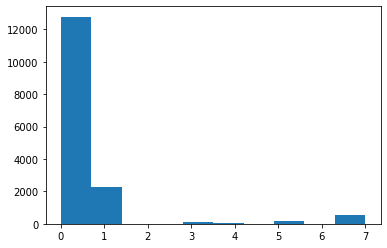

In [10]:
plt.hist(df_test['X_1'])

Final Verdict: <br>
This is basically the same distribution, therefore we will definitely be using X_1 variable

## X_2

In [11]:
# print("Value Counts for Train : ")
# print(df['X_2'].value_counts())
# print("****"*5)
# print("Value Counts for Test : ")
# print(df_test['X_2'].value_counts())
# print("****"*5)

(array([5402., 1299.,  333., 1503., 3891.,  865., 4717., 2117., 1824.,
        1905.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

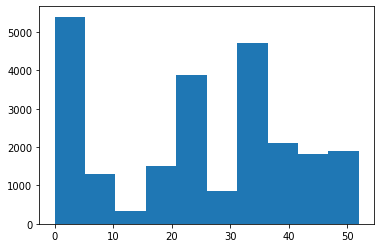

In [12]:
plt.hist(df['X_2'])

(array([3635.,  848.,  235., 1000., 2608.,  610., 3050., 1413., 1293.,
        1211.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

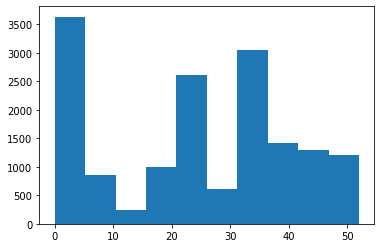

In [13]:
plt.hist(df_test['X_2'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data

## X_3

(array([5402., 1299.,  880.,  956., 3891.,  811., 4771., 2117., 1824.,
        1905.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

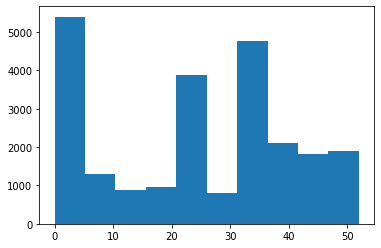

In [14]:
plt.hist(df['X_3'])

(array([3635.,  848.,  600.,  635., 2608.,  596., 3064., 1413., 1293.,
        1211.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

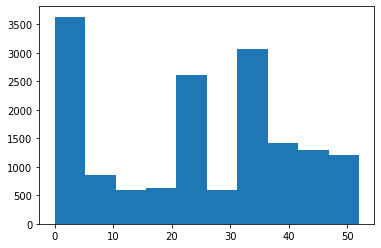

In [15]:
plt.hist(df_test['X_3'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data

## X_4

(array([3.335e+03, 8.410e+02, 4.791e+03, 1.871e+03, 2.027e+03, 2.000e+00,
        5.497e+03, 2.890e+03, 0.000e+00, 2.602e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

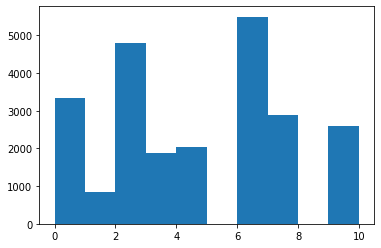

In [16]:
plt.hist(df['X_4'])

(array([2253.,  620., 3092., 1289., 1342.,    4., 3581., 1891.,    0.,
        1831.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

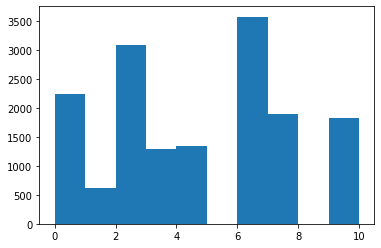

In [17]:
plt.hist(df_test['X_4'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data <br>
As we can see the missing values are also very similar, for ex (8 and 9) missing, therefore the data has been very thoughtfully split

## X_5

(array([4.695e+03, 0.000e+00, 6.818e+03, 0.000e+00, 2.000e+00, 0.000e+00,
        4.973e+03, 0.000e+00, 0.000e+00, 7.368e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

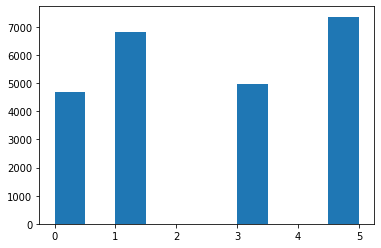

In [18]:
plt.hist(df['X_5'])

(array([3.213e+03, 0.000e+00, 4.434e+03, 0.000e+00, 4.000e+00, 0.000e+00,
        3.382e+03, 0.000e+00, 0.000e+00, 4.870e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

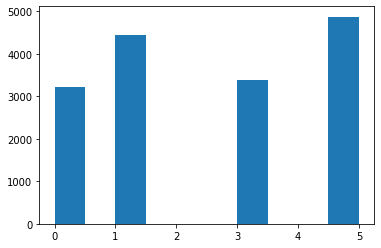

In [19]:
plt.hist(df_test['X_5'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data <br>
As we can see the missing values are also very similar, training and testing data is very much the same, we can use it as it is.

## X_6

(array([5759., 4027., 5308., 3691., 1267.,  225.,  349., 2336.,  730.,
         164.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

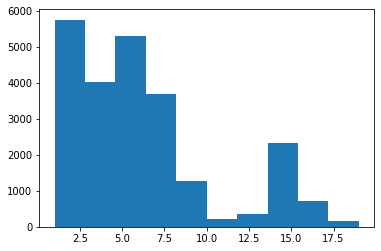

In [20]:
plt.hist(df['X_6'])

(array([3898., 2751., 3558., 2393.,  831.,  141.,  230., 1517.,  479.,
         105.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

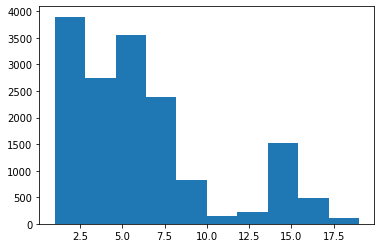

In [21]:
plt.hist(df_test['X_6'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data <br>
The peaks of the values are also similar, so the individual distribution of the features is also similar, therefore the learning should be quite homogenous

## X_7

(array([5747., 3724., 4337., 4977., 1267., 2320.,  730.,  180.,  235.,
         339.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

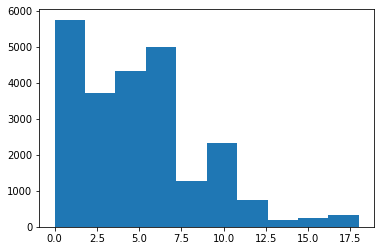

In [22]:
plt.hist(df['X_7'])

(array([3775., 2501., 2962., 3362.,  831., 1507.,  479.,  115.,  143.,
         228.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

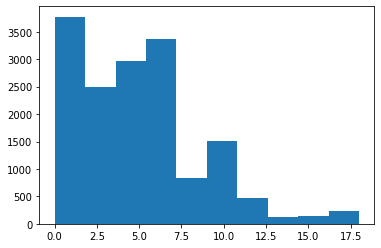

In [23]:
plt.hist(df_test['X_7'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data <br>
The peaks of the values are also similar, so the individual distribution of the features is also similar, therefore the learning should be quite homogenous

## X_8

In the X_8 variable we noticed that in the training data, the max value is 99 whereas it is 50 in the test data <br>
Lets investigate this further

(array([2.379e+04, 5.600e+01, 7.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

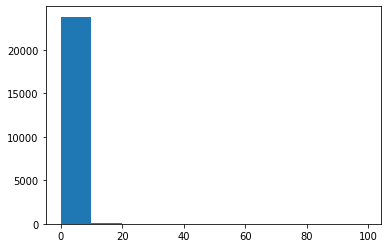

In [24]:
plt.hist(df['X_8'])

(array([1.5577e+04, 2.7300e+02, 3.1000e+01, 9.0000e+00, 8.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

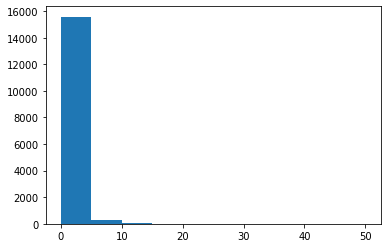

In [25]:
plt.hist(df_test['X_8'])

In [52]:
df[df['X_8']>50] # Aha! there is only one such value therefore we can remove this value from our dataset in totality
df = df[df['X_8']<=50]

(array([2.3423e+04, 3.6700e+02, 4.3000e+01, 1.3000e+01, 6.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

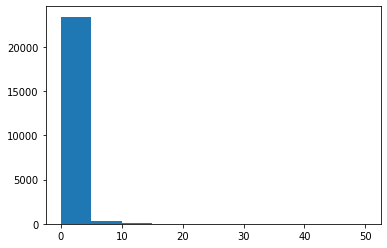

In [27]:
plt.hist(df['X_8'])

(array([1.5577e+04, 2.7300e+02, 3.1000e+01, 9.0000e+00, 8.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

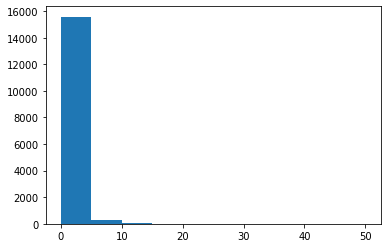

In [28]:
plt.hist(df_test['X_8'])

Analyzing the few values which are greater than 20, now they are almost similar, the value of 90 was definitely an outlier, therefore we are ignoring it.

In [29]:
df[df['X_8']>20]['X_8']

14335    30
14870    21
15670    29
16917    50
19151    22
Name: X_8, dtype: int64

In [30]:
df_test[df_test['X_8']>20]['X_8']

187      40
1639     25
2784     30
4505     50
13142    50
15372    22
Name: X_8, dtype: int64

Hence now the values look quite homogeneous, moving forward to X_9

Similarly, we can say something similar about the X_10 variable, where the max value is different in the training data than in the testing data, let's investigate

## X_9

(array([1.1800e+02, 1.7500e+02, 0.0000e+00, 3.0400e+03, 0.0000e+00,
        4.5200e+02, 4.0000e+00, 0.0000e+00, 1.0558e+04, 9.5080e+03]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

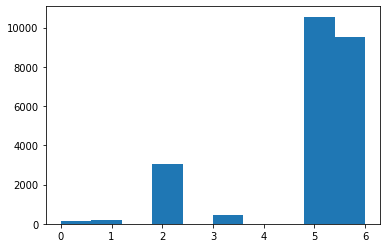

In [31]:
plt.hist(df['X_9'])

(array([8.200e+01, 1.350e+02, 0.000e+00, 2.051e+03, 0.000e+00, 3.100e+02,
        1.000e+00, 0.000e+00, 7.051e+03, 6.273e+03]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

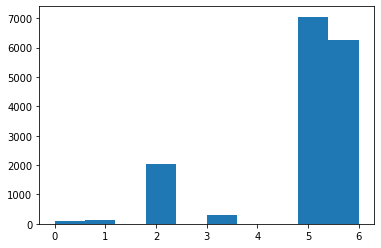

In [32]:
plt.hist(df_test['X_9'])

Final Verdict: <br>
Again, as wel can see, the disrtibution is pretty much the same, so we do not have much to worry about this feature and it is distributed somewhat similarly in the train and the test data <br>
The peaks of the values are also similar, so the individual distribution of the features is also similar, therefore the learning should be quite homogenous

## X_10

(array([2.3821e+04, 2.6000e+01, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <a list of 10 Patch objects>)

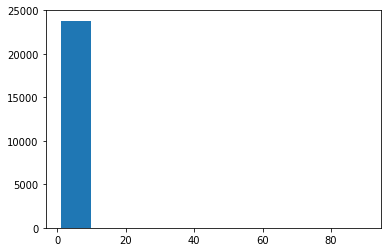

In [33]:
plt.hist(df['X_10'])

(array([1.5771e+04, 1.0700e+02, 1.8000e+01, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]),
 <a list of 10 Patch objects>)

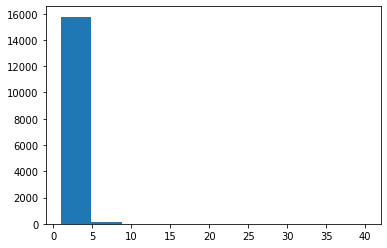

In [34]:
plt.hist(df_test['X_10'])

In [35]:
df[df['X_10']>20]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
2351,CR_25412,23-MAY-95,1,4,4,6,5,15,10,4,6,90,249,90.0,92,29,34,1
4616,CR_72319,20-APR-00,1,49,49,6,5,15,10,0,5,30,249,30.0,103,119,34,1
9729,CR_33487,20-SEP-96,7,4,4,6,5,9,8,1,6,58,249,58.0,112,14,34,1
15670,CR_10435,30-APR-92,0,45,45,10,3,1,0,29,2,22,183,14.0,72,142,39,0
17263,CR_13679,26-JAN-93,1,22,22,7,3,15,10,1,6,40,0,40.0,72,29,34,1


In [36]:
df_test[df_test['X_10']>20]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
230,CR_95950,17-SEP-03,0,44,44,1,3,7,1,1,2,28,55,0.0,112,142,34
7000,CR_10768,12-MAR-92,1,49,49,6,5,12,16,0,5,40,249,40.0,92,29,34


In [37]:
# Only two values which I would say are outlier-ish, 58 and 90, I guess we can remove these from our training dataset, to simulate more homogenous data when compared to the test data

(array([2.0198e+04, 2.6950e+03, 5.4900e+02, 2.2500e+02, 0.0000e+00,
        7.1000e+01, 5.4000e+01, 7.0000e+00, 1.5000e+01, 7.0000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

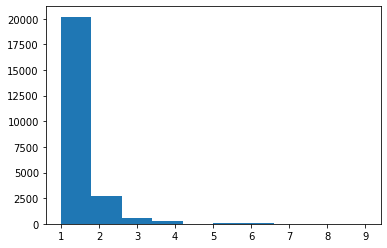

In [38]:
plt.hist(df[df['X_10']<10]['X_10'])

(array([1.342e+04, 1.837e+03, 3.750e+02, 1.390e+02, 0.000e+00, 4.300e+01,
        3.800e+01, 1.600e+01, 1.000e+01, 4.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

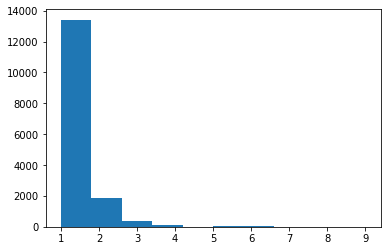

In [39]:
plt.hist(df_test[df_test['X_10']<10]['X_10'])

The distributin when it comes to commonly occuring values is pretty much the same, therefore, we can use the data with those two values dropped

In [53]:
df = df[df['X_10']<=40]

## X_11

(array([2618.,   74.,  293.,  514.,   50., 7513.,  265., 7078.,  178.,
        5270.]),
 array([  0. ,  33.2,  66.4,  99.6, 132.8, 166. , 199.2, 232.4, 265.6,
        298.8, 332. ]),
 <a list of 10 Patch objects>)

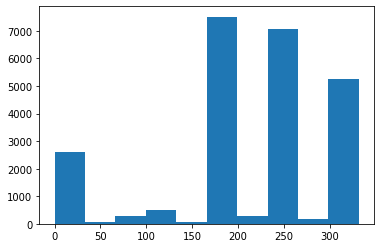

In [41]:
plt.hist(df['X_11'])

(array([1743.,   56.,  185.,  360.,   32., 5002.,  152., 4733.,  123.,
        3517.]),
 array([  0. ,  33.2,  66.4,  99.6, 132.8, 166. , 199.2, 232.4, 265.6,
        298.8, 332. ]),
 <a list of 10 Patch objects>)

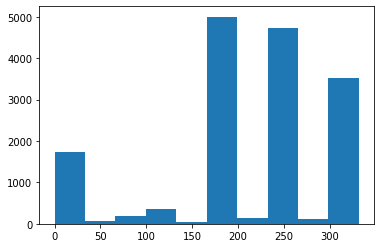

In [42]:
plt.hist(df_test['X_11'])

This feature is very similar, therefore keeping them the feature as it is

## X_12

(array([2.336e+04, 2.750e+02, 2.600e+01, 4.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

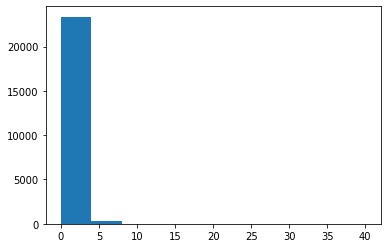

In [43]:
plt.hist(df['X_12'])

(array([1.5578e+04, 1.7500e+02, 1.8000e+01, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

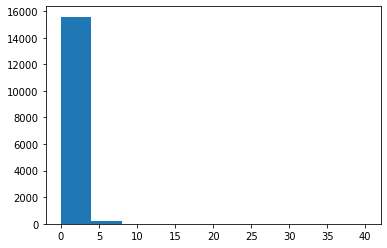

In [44]:
plt.hist(df_test['X_12'])

In [57]:
df[df['X_12']>=40]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
17263,CR_13679,26-JAN-93,1,22,22,7,3,15,10,1,6,40,0,40.0,72,29,34,1


In [56]:
df_test[df_test['X_12']>=40]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
7000,CR_10768,12-MAR-92,1,49,49,6,5,12,16,0,5,40,249,40.0,92,29,34


So the outlier for X_12 has already been removed in the case of either X_8 or X_10, haha! so less work / stress to take for this feature. Moving on to X_13

## X_13

(array([ 274., 1280.,  946.,  212.,  406.,  564., 4485., 3653., 8464.,
        3569.]),
 array([  0. ,  11.6,  23.2,  34.8,  46.4,  58. ,  69.6,  81.2,  92.8,
        104.4, 116. ]),
 <a list of 10 Patch objects>)

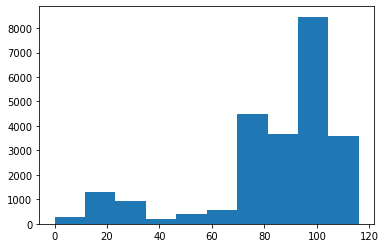

In [58]:
plt.hist(df['X_13'])

(array([ 207.,  826.,  620.,  107.,  263.,  338., 3144., 2360., 5798.,
        2240.]),
 array([  0. ,  11.7,  23.4,  35.1,  46.8,  58.5,  70.2,  81.9,  93.6,
        105.3, 117. ]),
 <a list of 10 Patch objects>)

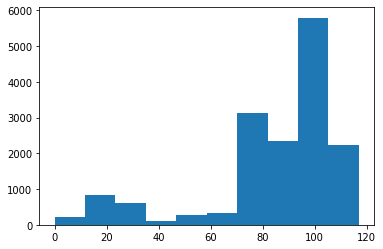

In [59]:
plt.hist(df_test['X_13'])

So apparently the oulier value for X_13 has also been wiped out, interesting, therefore we dont have to worry about this either

## X_14

(array([1065.,  100., 8170.,  195., 2501., 1572., 3573., 1257.,  837.,
        4583.]),
 array([  0. ,  14.2,  28.4,  42.6,  56.8,  71. ,  85.2,  99.4, 113.6,
        127.8, 142. ]),
 <a list of 10 Patch objects>)

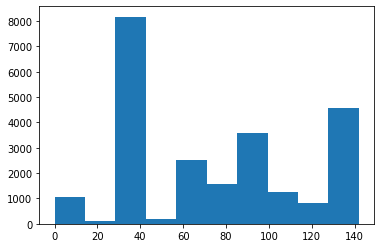

In [63]:
plt.hist(df['X_14'])

(array([ 767.,   58., 5507.,  144., 1611., 1095., 2306.,  843.,  512.,
        3060.]),
 array([  0. ,  14.2,  28.4,  42.6,  56.8,  71. ,  85.2,  99.4, 113.6,
        127.8, 142. ]),
 <a list of 10 Patch objects>)

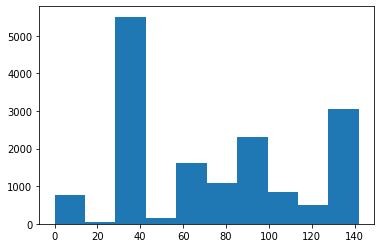

In [64]:
plt.hist(df_test['X_14'])

## X_15

(array([1.0210e+03, 9.4000e+01, 2.0000e+00, 2.0000e+01, 6.6400e+02,
        0.0000e+00, 1.8946e+04, 2.5700e+02, 1.5150e+03, 1.3340e+03]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

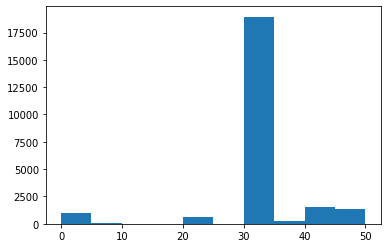

In [66]:
plt.hist(df['X_15'])

(array([6.660e+02, 8.100e+01, 2.000e+00, 1.000e+01, 4.310e+02, 1.000e+00,
        1.270e+04, 1.730e+02, 1.012e+03, 8.270e+02]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

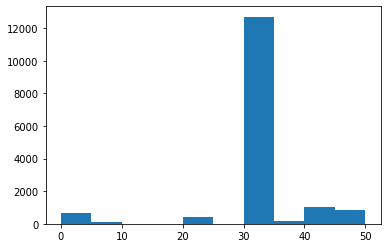

In [68]:
plt.hist(df_test['X_15'])

Nothing to do for X_14 and X_15

# Final Outtakes from this excercise

Therefore, we essentially did the outlier detection, and we eliminated 3 rows from the data
We might include those data points as well, but for now we have got some clue on how to proceed ahead.

One interesting thing that I noticed is, that these values X_1...X_15 are not exactly numerical values, I mean there are not continuous /  spaced out enough for us to use it as a continuous variable therefore, we will have to treat them as categorical variables.

One problem while treating them as categorical variables though is that, there might be cases in which the testing data category is not present in the training category, in those cases we might have to manually engineer a feature
<p>
In fact, we will have to in some peculiar cases

Therefore let us do this analysis one by one, however, we will write a function to do this step for now

In [73]:
def analyze_categories(df, df_test, cat):
    s1 = set(list(df[cat]))
    s2 = set(list(df_test[cat]))
    common_ = s1.intersection(s2)
    present_in_s1_only = s1.difference(s2)
    present_in_s2_only = s2.difference(s1)
    return {
        "common" : list(common_), 
        "s1_only" : list(present_in_s1_only), 
        "s2_only" : list(present_in_s2_only)
        }

In [75]:
# X_1
print("***"*5)
print("X_1")
print(analyze_categories(df, df_test, 'X_1'))
print("***"*5)

print("***"*5)
print("X_2")
print(analyze_categories(df, df_test, 'X_2'))
print("***"*5)

print("***"*5)
print("X_3")
print(analyze_categories(df, df_test, 'X_3'))
print("***"*5)

print("***"*5)
print("X_4")
print(analyze_categories(df, df_test, 'X_4'))
print("***"*5)

print("***"*5)
print("X_5")
print(analyze_categories(df, df_test, 'X_5'))
print("***"*5)

print("***"*5)
print("X_6")
print(analyze_categories(df, df_test, 'X_6'))
print("***"*5)

print("***"*5)
print("X_7")
print(analyze_categories(df, df_test, 'X_7'))
print("***"*5)

print("***"*5)
print("X_8")
print(analyze_categories(df, df_test, 'X_8'))
print("***"*5)

print("***"*5)
print("X_9")
print(analyze_categories(df, df_test, 'X_9'))
print("***"*5)

print("***"*5)
print("X_10")
print(analyze_categories(df, df_test, 'X_10'))
print("***"*5)

print("***"*5)
print("X_11")
print(analyze_categories(df, df_test, 'X_11'))
print("***"*5)

print("***"*5)
print("X_12")
print(analyze_categories(df, df_test, 'X_12'))
print("***"*5)

print("***"*5)
print("X_13")
print(analyze_categories(df, df_test, 'X_13'))
print("***"*5)

print("***"*5)
print("X_14")
print(analyze_categories(df, df_test, 'X_14'))
print("***"*5)

print("***"*5)
print("X_15")
print(analyze_categories(df, df_test, 'X_15'))
print("***"*5)


# Yeaaaah! All the categories present in both train and test, no need for engineering

***************
X_1
{'common': [0, 1, 2, 3, 4, 5, 6, 7], 's1_only': [], 's2_only': []}
***************
***************
X_2
{'common': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 's1_only': [], 's2_only': []}
***************
***************
X_3
{'common': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 's1_only': [], 's2_only': []}
***************
***************
X_4
{'common': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10], 's1_only': [], 's2_only': []}
***************
***************
X_5
{'common': [0, 1, 2, 3, 5], 's1_only': [], 's2_only': []}
***************
***************
X_6
{'common': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 's1_only': [], 's2_only': []}
*********

The problem persists in X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_9 are completelty fine, that is they can be used as it is in the model, without any concerns.


X_8 --> has some values which are not common, therefore we will have to work on it <br>
X_10 --> There are some values which are not in common <br>
X_11 --> There are some values which are not in common <br>
X_12 --> There are NaN values in X_12 --> Have to do MVI in this <br>
X_13 --> There are some value which are not present <br>
X_14 --> Again some uncommon values <br>
X_15 --> Again some uncommon values <br>